In [0]:
### IMPORTAÇÃO DAS BIBLIOTECAS ###

import matplotlib.pyplot as plt # importação da biblioteca matplotlib
import numpy as np # importação da biblioteca numpy 
import seaborn as sns # importação da biblioteca seaborn
import pandas as pd # importação da biblioteca pandas

from sklearn import preprocessing
import sklearn

# Divide arrays ou matrizes em subconjuntos aleatórios de treino e teste
from sklearn.model_selection import train_test_split # importação da biblioteca de treino e teste
from sklearn.linear_model import LogisticRegression # importação do algoritmo de Regressão Logística
from sklearn.metrics import accuracy_score # importação da biblioteca de medir a acurácia do algoritmo de ML

from sklearn.metrics import confusion_matrix # importação do algoritmo de Matrix de Confusão
from sklearn.metrics import classification_report 
from sklearn.svm import LinearSVC # importação da biblioteca LinearSVC

import time # importação da biblioteca para calcular o tempo de execução de um trecho do código

# Le o arquivo do dataset
originalDS = pd.read_csv("weatherHistory.csv", encoding ='latin1')
df = originalDS.copy()

# Converte a coluna 'Precip Type' em inteiros
precip_type = df.replace(["rain","snow",np.nan],[0,1,2])
df = precip_type

# Separando as features principais
df = df[['Temperature (C)', 
         'Humidity',
         'Pressure (millibars)', 
         'Precip Type']]

# Defining axis
X = df[['Temperature (C)','Pressure (millibars)','Humidity']] 
y = df[['Precip Type']]

In [0]:
# Separando o dataset em variáveis de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.22, random_state=42)

# Instancia o algoritmo de Regressão Logística
lr = LogisticRegression(max_iter=1000, solver="lbfgs")

# Treina o algoritmo e tenta prever resultados
start = time.time()
lr.fit(X_treino, y_treino)
predict = lr.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)

print('\n\n* Time in seconds: %d' % (time.time() - start))
print("Accuracy: %.2f" % (accuracy * 100))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




* Time in seconds: 4
Accuracy: 99.26


In [0]:
confusion_matrix(y_teste, predict)


array([[18646,    34,     0],
       [    0,  2417,     0],
       [  123,     0,     0]])

In [0]:
confusion_matrix(y_teste, predict)


array([[18648,    32,     0],
       [    0,  2417,     0],
       [  123,     0,     0]])

In [0]:
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18680
           1       0.99      1.00      0.99      2417
           2       0.00      0.00      0.00       123

    accuracy                           0.99     21220
   macro avg       0.66      0.67      0.66     21220
weighted avg       0.99      0.99      0.99     21220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18680
           1       0.99      1.00      0.99      2417
           2       0.00      0.00      0.00       123

    accuracy                           0.99     21220
   macro avg       0.66      0.67      0.66     21220
weighted avg       0.99      0.99      0.99     21220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# Instancia o algoritmo LinearSVC
linearSVC = LinearSVC()

# Treina e testa o algoritmo LinearSVC
start = time.time()
linearSVC.fit(X_treino, y_treino)
predict = linearSVC.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)

print('\n\n* Time in seconds: %d' % (time.time() - start))
print("Accuracy: %.2f" % (accuracy * 100))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




* Time in seconds: 7
Accuracy: 98.05


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
confusion_matrix(y_teste, predict)

array([[18390,   290,     0],
       [    0,  2417,     0],
       [  123,     0,     0]])

In [0]:
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18680
           1       0.89      1.00      0.94      2417
           2       0.00      0.00      0.00       123

    accuracy                           0.98     21220
   macro avg       0.63      0.66      0.64     21220
weighted avg       0.98      0.98      0.98     21220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
logreg = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'multi_class': ['ovr', 'multinomial'],

}

linsvm = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2' ],
    'multi_class': ['ovr', 'multinomial'],

}

In [0]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='saga')
svm = LinearSVC()

In [0]:
grid_lr = GridSearchCV(lr, logreg)
grid_lr.fit(X_treino, y_treino)

predict = gird_lr.predict(X_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y

NameError: ignored

In [0]:
confusion_matrix(y_teste, predict)

array([[18390,   290,     0],
       [    0,  2417,     0],
       [  123,     0,     0]])

In [0]:
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18680
           1       0.89      1.00      0.94      2417
           2       0.00      0.00      0.00       123

    accuracy                           0.98     21220
   macro avg       0.63      0.66      0.64     21220
weighted avg       0.98      0.98      0.98     21220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#grid_svm = GridSearchCV(svm, linsvm)
#grid_svm.fit(X_treino, y_treino)

predict = grid_svm.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)
accuracy

0.991894439208294

In [0]:
confusion_matrix(y_teste, predict)

array([[18638,    19,    23],
       [    3,  2410,     4],
       [  123,     0,     0]])

In [0]:
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18680
           1       0.99      1.00      0.99      2417
           2       0.00      0.00      0.00       123

    accuracy                           0.99     21220
   macro avg       0.66      0.66      0.66     21220
weighted avg       0.99      0.99      0.99     21220



In [0]:
grid_lr.best_params_

{'C': 100.0, 'multi_class': 'multinomial', 'penalty': 'l1', 'tol': 0.0001}

In [0]:
grid_svm.best_params_

{'C': 10.0,
 'loss': 'hinge',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'tol': 0.0001}

Busca features 
One-vs-All (grid e features)
Rebalanceamento
Remapeamento "Daily Summary" (esparcidade)

---

{'C': 10.0,
 'loss': 'hinge',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'tol': 0.0001}

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
df0 = df.copy()
df1 = df.copy()
df2 = df.copy()

In [0]:

df0['Precip Type'] = df0['Precip Type'].apply(lambda x: 0 if x == 0 else 1)
df0['Precip Type'].unique()

array([0, 1])

In [0]:
df1['Precip Type'] = df1['Precip Type'].apply(lambda x: 1 if x == 1 else 0)
df1['Precip Type'].unique()

array([0, 1])

In [0]:
df2['Precip Type'] = df2['Precip Type'].apply(lambda x: 2 if x == 2 else 0)
df2['Precip Type'].unique()

array([0, 2])

In [0]:
X0 = df0[['Temperature (C)','Pressure (millibars)','Humidity']] 
y0 = df0[['Precip Type']]

X_treino0, X_teste0, y_treino0, y_teste0 = train_test_split(X0, y0, test_size=0.22, random_state=40)

linsvm0 = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2' ],
    # 'multi_class': ['ovr', 'multinomial'],

}

svm0 = LinearSVC()

grid_svm0 = GridSearchCV(svm0, linsvm0)
grid_svm0.fit(X_treino0, y_treino0)

predict0 = grid_svm.predict(X_teste0)
accuracy0 = accuracy_score(y_teste0, predict0)
print(accuracy0)

print(confusion_matrix(y_teste0, predict0))

print(classification_report(y_teste0, predict0))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: Fi

0.8846371347785108
[[18772     0]
 [ 2448     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     18772
           1       0.00      0.00      0.00      2448

    accuracy                           0.88     21220
   macro avg       0.44      0.50      0.47     21220
weighted avg       0.78      0.88      0.83     21220



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
X1 = df1[['Temperature (C)','Pressure (millibars)','Humidity']] 
y1 = df1[['Precip Type']]

X_treino1, X_teste1, y_treino1, y_teste1 = train_test_split(X1, y1, test_size=0.22, random_state=42)

linsvm1 = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2' ],
    # 'multi_class': ['ovr', 'multinomial'],

}

svm1 = LinearSVC()

grid_svm1 = GridSearchCV(svm1, linsvm1)
grid_svm.fit(X_treino1, y_treino1)

predict1 = grid_svm.predict(X_teste1)
accuracy1 = accuracy_score(y_teste1, predict1)
print(accuracy1)

print(confusion_matrix(y_teste1, predict1))

print(classification_report(y_teste1, predict1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: Fi

0.9952874646559849
[[18803     0]
 [  100  2317]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18803
           1       1.00      0.96      0.98      2417

    accuracy                           1.00     21220
   macro avg       1.00      0.98      0.99     21220
weighted avg       1.00      1.00      1.00     21220



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
X2 = df2[['Temperature (C)','Pressure (millibars)','Humidity']] 
y2 = df2[['Precip Type']]

X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X2, y2, test_size=0.22, random_state=42)

linsvm2 = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2' ],
    # 'multi_class': ['ovr', 'multinomial'],

}

svm2 = LinearSVC()

grid_svm2 = GridSearchCV(svm2, linsvm2)
grid_svm.fit(X_treino2, y_treino2)

predict2 = grid_svm.predict(X_teste2)
accuracy2 = accuracy_score(y_teste2, predict2)
print(accuracy2)

print(confusion_matrix(y_teste2, predict2))

print(classification_report(y_teste2, predict2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: Fi

0.9942035815268615
[[21097     0]
 [  123     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21097
           2       0.00      0.00      0.00       123

    accuracy                           0.99     21220
   macro avg       0.50      0.50      0.50     21220
weighted avg       0.99      0.99      0.99     21220



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
grid_svm.best_params_

{'C': 0.01, 'loss': 'hinge', 'penalty': 'l2', 'tol': 0.001}

{'C': 10.0, 'loss': 'hinge', 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 0.0001}

In [0]:
X = df2[['Temperature (C)','Pressure (millibars)','Humidity']] 
y = df2[['Precip Type']]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.22, random_state=42)

svm2 = LinearSVC(C=10.0, loss='hinge', penalty= 'l2', tol=0.0001)
                 
predict = grid_svm.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)
print(accuracy)

print(confusion_matrix(y_teste, predict))

print(classification_report(y_teste, predict))

0.9942035815268615
[[21097     0]
 [  123     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21097
           2       0.00      0.00      0.00       123

    accuracy                           0.99     21220
   macro avg       0.50      0.50      0.50     21220
weighted avg       0.99      0.99      0.99     21220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
df.head()

Temperature (C)  Humidity  Pressure (millibars)  Precip Type
0         9.472222      0.89               1015.13            0
1         9.355556      0.86               1015.63            0
2         9.377778      0.89               1015.94            0
3         8.288889      0.83               1016.41            0
4         8.755556      0.83               1016.51            0

Random under-sampling:
2    517
1    517
0    517
Name: Precip Type, dtype: int64


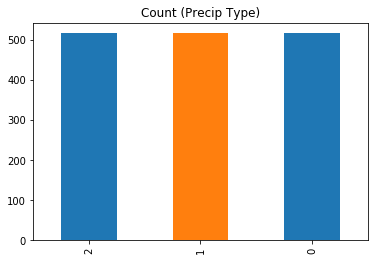

In [8]:
# CONTAR CLASSES
count_class_0, count_class_1, count_class_2 = df['Precip Type'].value_counts()
# Divide by class
df_class_0 = df[df['Precip Type'] == 0]
df_class_1 = df[df['Precip Type'] == 1]
df_class_2 = df[df['Precip Type'] == 2]

df_class_0_under = df_class_0.sample(count_class_2)
df_class_1_under = df_class_1.sample(count_class_2)

df_test_under = pd.concat([df_class_0_under, df_class_1_under, df_class_2], axis=0)
print('Random under-sampling:')
print(df_test_under['Precip Type'].value_counts())
df_test_under['Precip Type'].value_counts().plot(kind='bar', title='Count (Precip Type)',color = ['#1F77B4', '#FF7F0E']);

In [0]:

# Defining axis
X = df_test_under[['Temperature (C)','Pressure (millibars)','Humidity']] 
y = df_test_under[['Precip Type']]

In [10]:
# Separando o dataset em variáveis de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.22, random_state=42)

# Instancia o algoritmo de Regressão Logística
lr = LogisticRegression(max_iter=1000, solver="lbfgs")

# Treina o algoritmo e tenta prever resultados
start = time.time()
lr.fit(X_treino, y_treino)
predict = lr.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)

print('\n\n* Time in seconds: %d' % (time.time() - start))
print("Accuracy: %.2f" % (accuracy * 100))






* Time in seconds: 0
Accuracy: 77.78


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(confusion_matrix(y_teste, predict))

print(classification_report(y_teste, predict))

[[ 65   2  46]
 [  0 116   0]
 [ 28   0  85]]
              precision    recall  f1-score   support

           0       0.70      0.58      0.63       113
           1       0.98      1.00      0.99       116
           2       0.65      0.75      0.70       113

    accuracy                           0.78       342
   macro avg       0.78      0.78      0.77       342
weighted avg       0.78      0.78      0.77       342



In [0]:
logreg = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'multi_class': ['ovr', 'multinomial'],

}

linsvm = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'tol': [1e-3, 1e-4, 1e-5],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2' ],
    'multi_class': ['ovr', 'multinomial'],

}

In [16]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='saga')
svm = LinearSVC()

grid_lr = GridSearchCV(lr, logreg)
grid_lr.fit(X_treino, y_treino)

predict = grid_lr.predict(X_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y

In [17]:
print(confusion_matrix(y_teste, predict))
print(classification_report(y_teste, predict))

[[ 67  12  34]
 [  0 116   0]
 [ 45   2  66]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       113
           1       0.89      1.00      0.94       116
           2       0.66      0.58      0.62       113

    accuracy                           0.73       342
   macro avg       0.72      0.73      0.72       342
weighted avg       0.72      0.73      0.72       342



In [18]:
grid_svm = GridSearchCV(svm, linsvm)
grid_svm.fit(X_treino, y_treino)

predict = grid_svm.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)
accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: Fi

0.6754385964912281

In [19]:
print(confusion_matrix(y_teste, predict))
print(classification_report(y_teste, predict))

[[ 80   8  25]
 [  0 116   0]
 [ 76   2  35]]
              precision    recall  f1-score   support

           0       0.51      0.71      0.59       113
           1       0.92      1.00      0.96       116
           2       0.58      0.31      0.40       113

    accuracy                           0.68       342
   macro avg       0.67      0.67      0.65       342
weighted avg       0.67      0.68      0.66       342



In [0]:
df = originalDS.copy()

# Converte a coluna 'Precip Type' em inteiros
precip_type = df.replace(["rain","snow",np.nan],[0,1,2])
df = precip_type

# Separando as features principais
df = df[['Temperature (C)', 
         'Humidity',
         'Pressure (millibars)', 
         'Precip Type']]

# Defining axis
X = df[['Temperature (C)','Pressure (millibars)','Humidity']] 
y = df[['Precip Type']]

In [0]:
# Separando o dataset em variáveis de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.22, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_treino, y_treino)

predict = rfc.predict(X_teste)
accuracy = accuracy_score(y_teste, predict)
accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9941093308199811

In [25]:
print(confusion_matrix(y_teste, predict))

print(classification_report(y_teste, predict))

[[18678     0     2]
 [    0  2417     0]
 [  123     0     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18680
           1       1.00      1.00      1.00      2417
           2       0.00      0.00      0.00       123

    accuracy                           0.99     21220
   macro avg       0.66      0.67      0.67     21220
weighted avg       0.99      0.99      0.99     21220



In [0]:
linrfc = {
    'n_estimators': [10,25,50,75,100,125,150,200],
    'criterion': ['gini','entropy'],
    'class_weight': [None,'balanced','balanced_subsample'],
}

In [0]:
#rfc = RandomForestClassifier(random_state=42)

#grid_rfc = GridSearchCV(rfc, linrfc)
#grid_rfc.fit(X_treino, y_treino)

predict = grid_rfc.predict(X_teste)

In [31]:
print(confusion_matrix(y_teste, predict))

print(classification_report(y_teste, predict))

[[18676     0     4]
 [    0  2417     0]
 [  122     0     1]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18680
           1       1.00      1.00      1.00      2417
           2       0.20      0.01      0.02       123

    accuracy                           0.99     21220
   macro avg       0.73      0.67      0.67     21220
weighted avg       0.99      0.99      0.99     21220



In [0]:
df = originalDS.copy()

In [51]:
df.columns = ['formatted_date', 'summary', 'target', 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed',
       'wind_bearing', 'visibility', 'loud_cover',
       'pressure', 'daily_summary']
df.columns

Index(['formatted_date', 'summary', 'target', 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed', 'wind_bearing',
       'visibility', 'loud_cover', 'pressure', 'daily_summary'],
      dtype='object')

In [52]:
df.dtypes

formatted_date           object
summary                  object
target                   object
temperature             float64
apparent_temperature    float64
humidity                float64
wind_speed              float64
wind_bearing            float64
visibility              float64
loud_cover              float64
pressure                float64
daily_summary            object
dtype: object

In [53]:
df.describe(include = 'all').transpose()

count unique  ...      75%      max
formatted_date        96453  96429  ...      NaN      NaN
summary               96453     27  ...      NaN      NaN
target                95936      2  ...      NaN      NaN
temperature           96453    NaN  ...  18.8389  39.9056
apparent_temperature  96453    NaN  ...  18.8389  39.3444
humidity              96453    NaN  ...     0.89        1
wind_speed            96453    NaN  ...  14.1358  63.8526
wind_bearing          96453    NaN  ...      290      359
visibility            96453    NaN  ...   14.812     16.1
loud_cover            96453    NaN  ...        0        0
pressure              96453    NaN  ...  1021.09  1046.38
daily_summary         96453    214  ...      NaN      NaN

[12 rows x 11 columns]

In [0]:
df = df[[ 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed',
       'wind_bearing', 'visibility', 
       'pressure', 'target']]

In [55]:
df.head(10)

temperature  apparent_temperature  humidity  ...  visibility  pressure  target
0     9.472222              7.388889      0.89  ...     15.8263   1015.13    rain
1     9.355556              7.227778      0.86  ...     15.8263   1015.63    rain
2     9.377778              9.377778      0.89  ...     14.9569   1015.94    rain
3     8.288889              5.944444      0.83  ...     15.8263   1016.41    rain
4     8.755556              6.977778      0.83  ...     15.8263   1016.51    rain
5     9.222222              7.111111      0.85  ...     14.9569   1016.66    rain
6     7.733333              5.522222      0.95  ...      9.9820   1016.72    rain
7     8.772222              6.527778      0.89  ...      9.9820   1016.84    rain
8    10.822222             10.822222      0.82  ...      9.9820   1017.37    rain
9    13.772222             13.772222      0.72  ...      9.9820   1017.22    rain

[10 rows x 8 columns]

In [56]:
df.tail(10)

temperature  apparent_temperature  humidity  ...  visibility  pressure  target
96443    30.894444             29.450000      0.28  ...     15.5526   1014.66    rain
96444    31.083333             29.616667      0.28  ...     16.1000   1014.17    rain
96445    31.083333             29.611111      0.28  ...     16.1000   1013.97    rain
96446    30.766667             29.311111      0.28  ...     15.5526   1013.83    rain
96447    28.838889             27.850000      0.32  ...     16.1000   1014.07    rain
96448    26.016667             26.016667      0.43  ...     16.1000   1014.36    rain
96449    24.583333             24.583333      0.48  ...     15.5526   1015.16    rain
96450    22.038889             22.038889      0.56  ...     16.1000   1015.66    rain
96451    21.522222             21.522222      0.60  ...     16.1000   1015.95    rain
96452    20.438889             20.438889      0.61  ...     15.5204   1016.16    rain

[10 rows x 8 columns]

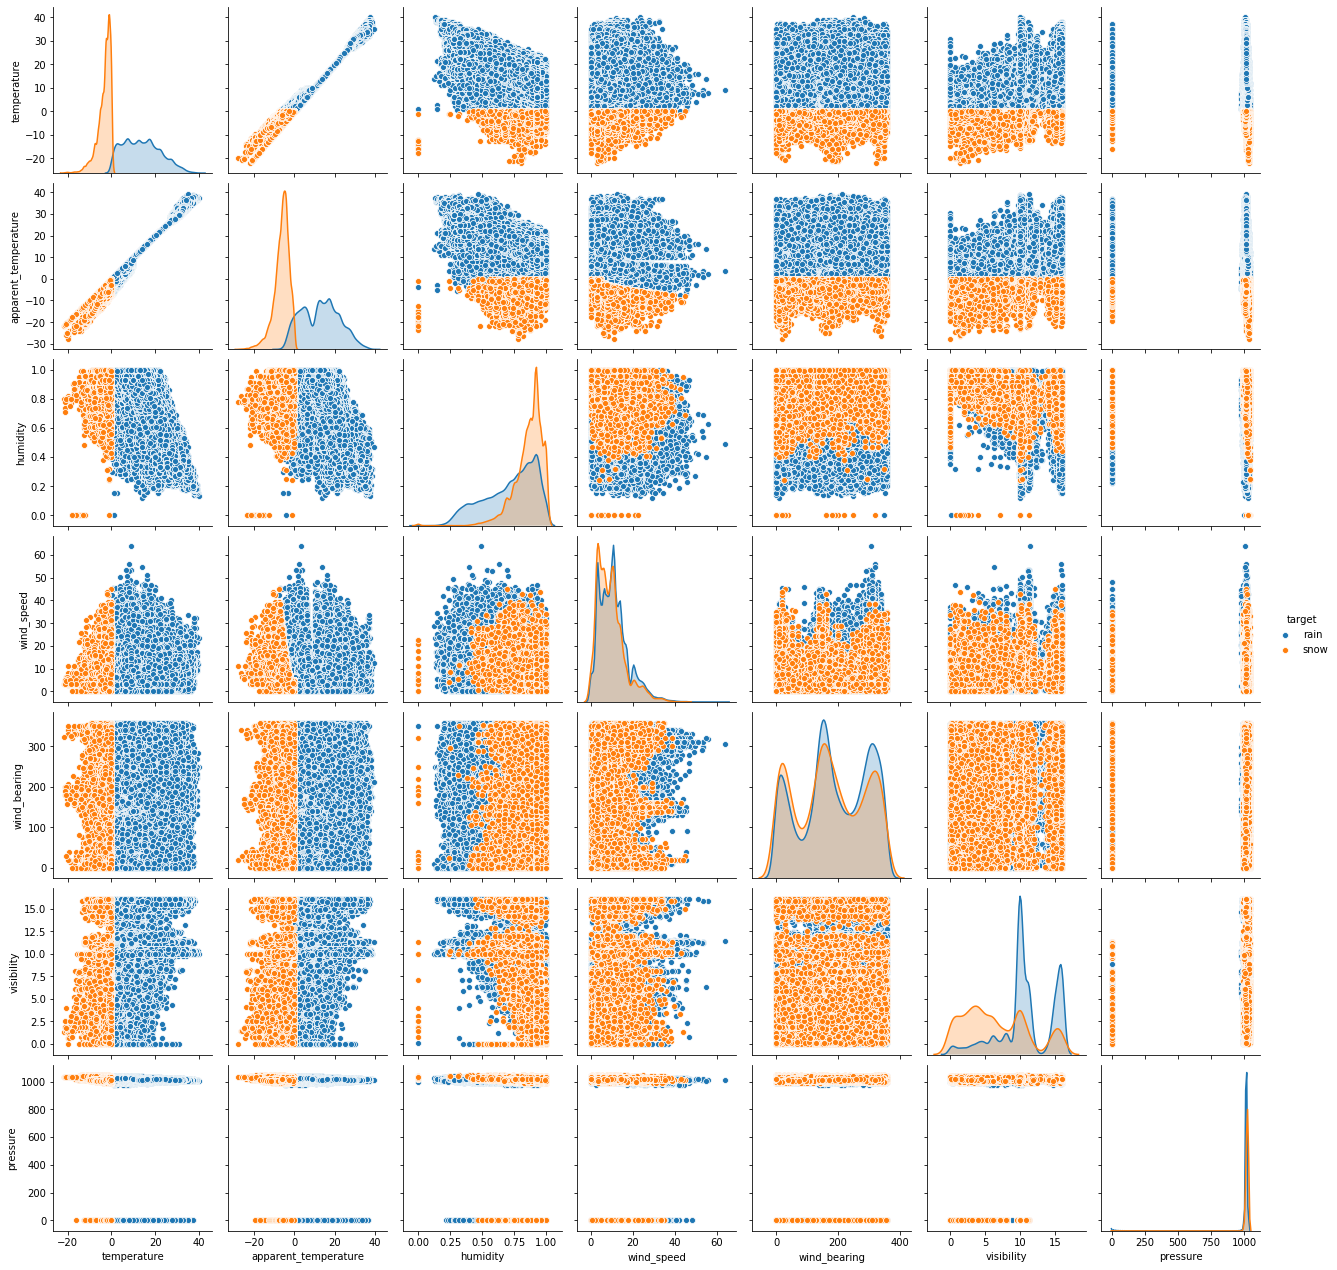

In [41]:
sns.pairplot(df, hue="target")

In [0]:
# Converte a coluna 'Precip Type' em inteiros
# df['target'] = df['target'].replace(["rain","snow",np.nan],[0,1,2])

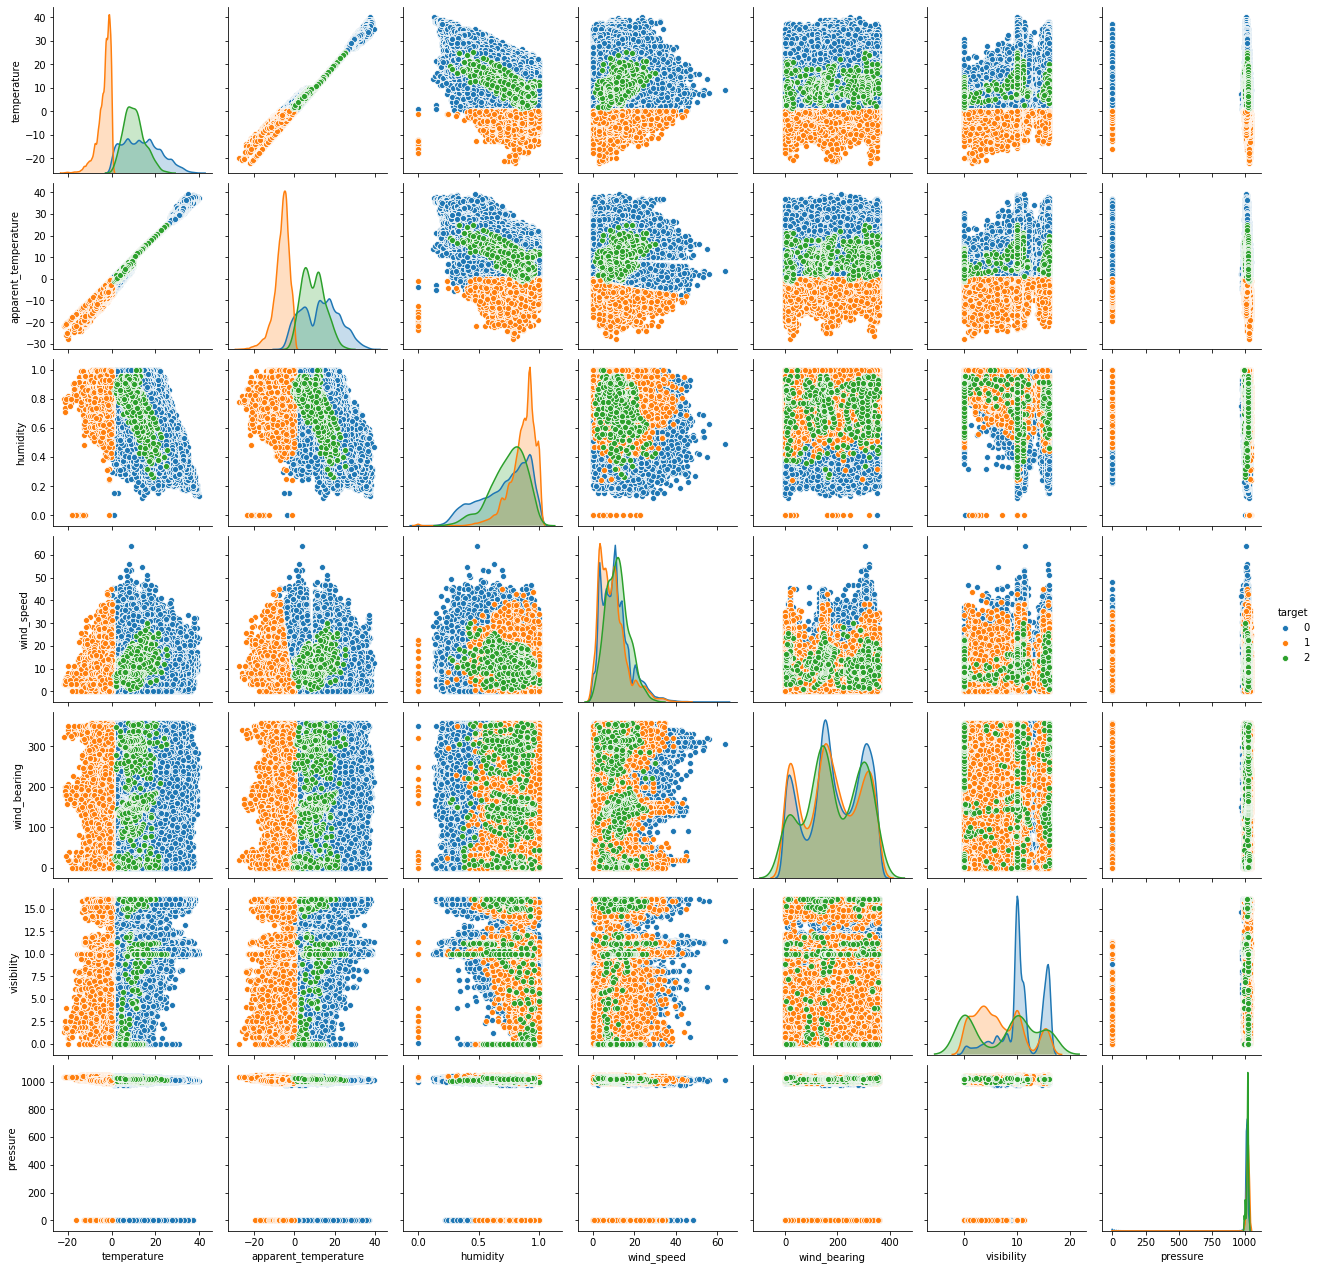

In [44]:
sns.pairplot(df, hue="target")

In [0]:
df  = df.dropna()

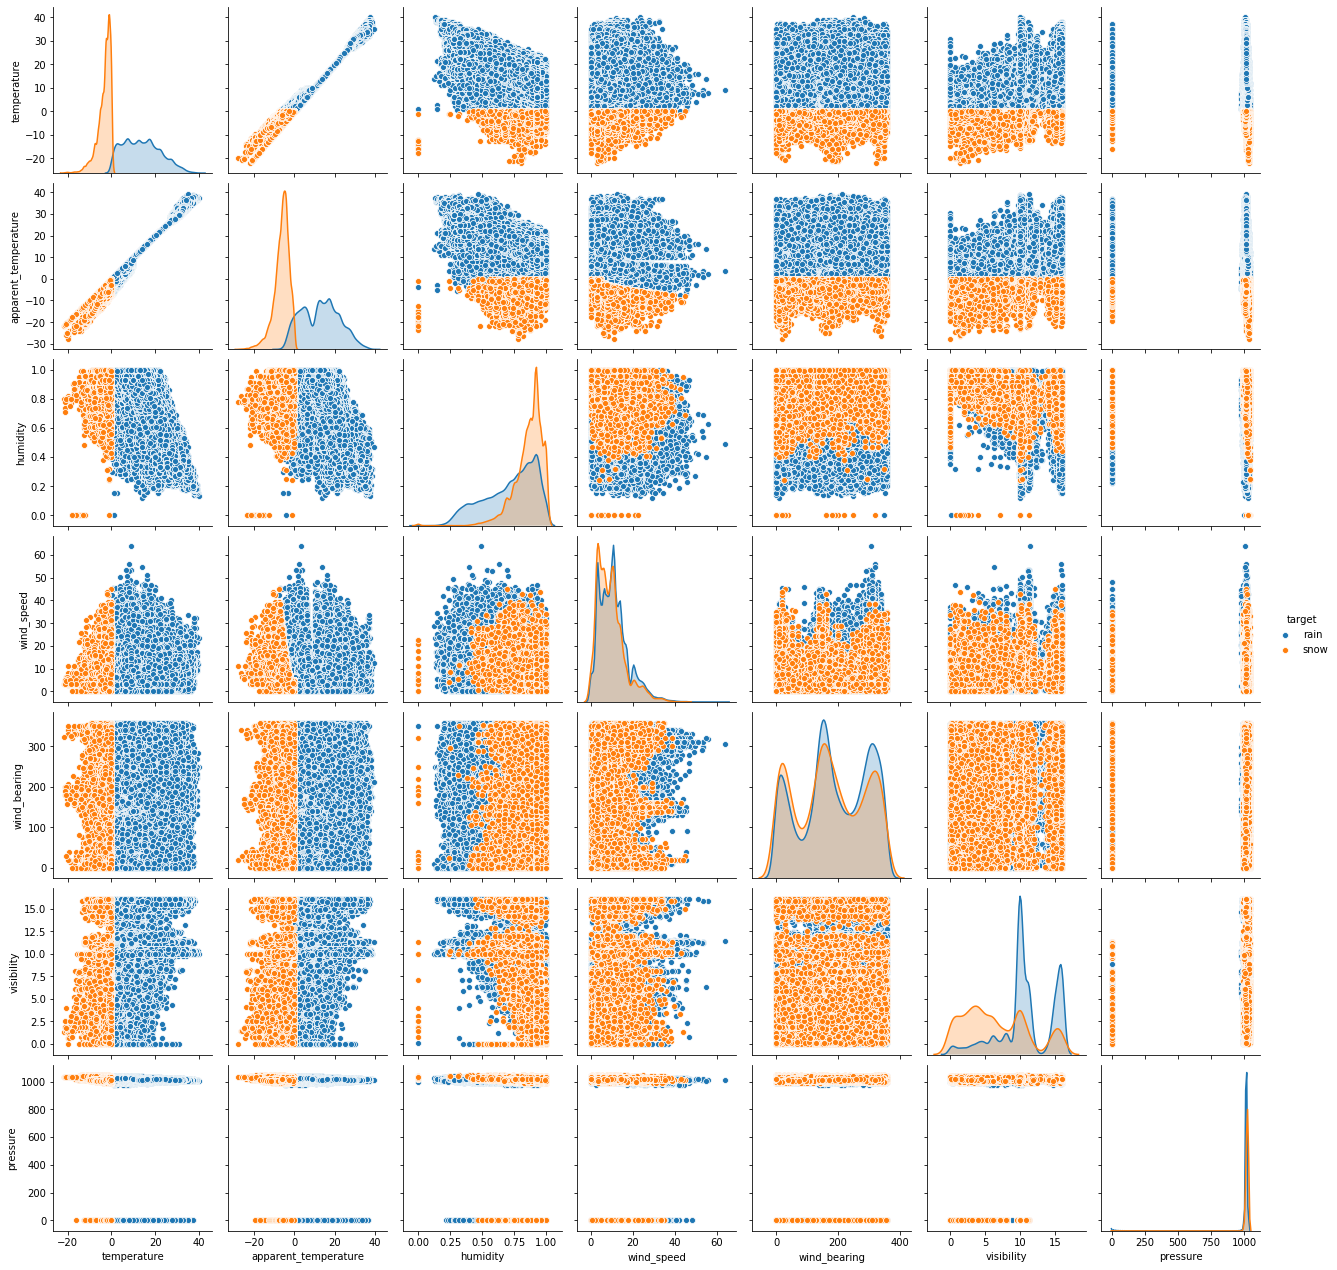

In [58]:
sns.pairplot(df, hue='target')

In [0]:
df = df[[ 'temperature',
       'apparent_temperature', 'humidity', 'wind_speed',
       'wind_bearing', 'visibility', 
       'pressure', 'target']]

X =  df[[ 'temperature']]
y = df['target']       

In [0]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.22, random_state=42)

In [0]:
lr = LogisticRegression()
lr.fit(X_treino, y_treino)
predict = lr.predict(X_teste)


In [70]:
print(accuracy_score(y_teste, predict))

print(confusion_matrix(y_teste, predict))

print(classification_report(y_teste, predict))

0.99815218421302
[[18720    39]
 [    0  2347]]
              precision    recall  f1-score   support

        rain       1.00      1.00      1.00     18759
        snow       0.98      1.00      0.99      2347

    accuracy                           1.00     21106
   macro avg       0.99      1.00      1.00     21106
weighted avg       1.00      1.00      1.00     21106



In [0]:
#accuracy_score(y_teste, predict) => 0.99815218421302